<a href="https://colab.research.google.com/gist/clovia66/bc0785a6046a4f9b86e03ed44a7977ae/finalyearprojectproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tunianani","key":"4924f0714a95e0208664d3cb50bd3baa"}'}

In [ ]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mmoreaux/audio-cats-and-dogs

 99% 96.0M/97.0M [00:01<00:00, 99.2MB/s]
100% 97.0M/97.0M [00:01<00:00, 75.7MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip /content/audio-cats-and-dogs.zip

Archive:  /content/audio-cats-and-dogs.zip
  inflating: cats_dogs/cat_1.wav     
  inflating: cats_dogs/cat_10.wav    
  inflating: cats_dogs/cat_100.wav   
  inflating: cats_dogs/cat_101.wav   
  inflating: cats_dogs/cat_102.wav   
  inflating: cats_dogs/cat_103.wav   
  inflating: cats_dogs/cat_105.wav   
  inflating: cats_dogs/cat_106.wav   
  inflating: cats_dogs/cat_107.wav   
  inflating: cats_dogs/cat_108.wav   
  inflating: cats_dogs/cat_109.wav   
  inflating: cats_dogs/cat_11.wav    
  inflating: cats_dogs/cat_110.wav   
  inflating: cats_dogs/cat_112.wav   
  inflating: cats_dogs/cat_113.wav   
  inflating: cats_dogs/cat_114.wav   
  inflating: cats_dogs/cat_115.wav   
  inflating: cats_dogs/cat_116.wav   
  inflating: cats_dogs/cat_117.wav   
  inflating: cats_dogs/cat_118.wav   
  inflating: cats_dogs/cat_119.wav   
  inflating: cats_dogs/cat_12.wav    
  inflating: cats_dogs/cat_120.wav   
  inflating: cats_dogs/cat_121.wav   
  inflating: cats_dogs/cat_122.wav   
  infla

In [ ]:
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Any results you write to the current directory are saved as output.
import os
sounds = os.listdir("/content/cats_dogs")
print(os.listdir("/content/cats_dogs"))
import warnings
warnings.filterwarnings("ignore")

['cat_123.wav', 'cat_13.wav', 'cat_90.wav', 'cat_42.wav', 'cat_17.wav', 'cat_153.wav', 'cat_83.wav', 'cat_115.wav', 'dog_barking_90.wav', 'cat_88.wav', 'dog_barking_112.wav', 'dog_barking_106.wav', 'cat_31.wav', 'cat_23.wav', 'dog_barking_58.wav', 'dog_barking_49.wav', 'cat_11.wav', 'cat_36.wav', 'cat_41.wav', 'dog_barking_15.wav', 'cat_164.wav', 'dog_barking_74.wav', 'cat_28.wav', 'cat_118.wav', 'cat_73.wav', 'dog_barking_22.wav', 'cat_101.wav', 'dog_barking_3.wav', 'cat_27.wav', 'dog_barking_48.wav', 'dog_barking_76.wav', 'dog_barking_95.wav', 'cat_32.wav', 'cat_76.wav', 'cat_148.wav', 'dog_barking_36.wav', 'dog_barking_92.wav', 'cat_71.wav', 'cat_53.wav', 'cat_109.wav', 'cat_122.wav', 'cat_156.wav', 'dog_barking_9.wav', 'dog_barking_64.wav', 'cat_144.wav', 'cat_159.wav', 'cat_86.wav', 'dog_barking_73.wav', 'dog_barking_85.wav', 'cat_34.wav', 'cat_89.wav', 'cat_58.wav', 'cat_21.wav', 'cat_54.wav', 'dog_barking_8.wav', 'cat_49.wav', 'cat_66.wav', 'dog_barking_56.wav', 'cat_160.wav', '

In [ ]:
import glob
import ntpath
# List the wav files
ROOT_DIR_TEST = glob.glob('/content/cats_dogs/test')[0]
ROOT_DIR_TRAIN = glob.glob('/content/cats_dogs/train')[0]


X_path = glob.glob(ROOT_DIR_TEST + "/test/*") # test = dogs in this case ! (wrong name of directory was given when it was created)
X_path = X_path + glob.glob(ROOT_DIR_TEST + "/cats/*")
X_path = X_path + glob.glob(ROOT_DIR_TRAIN + "/dog/*")
X_path = X_path + glob.glob(ROOT_DIR_TRAIN + "/cat/*")
print (len(X_path))

277


In [ ]:
y = np.empty((0, 1, ))
for f in X_path:
    if 'cat' in ntpath.basename(f):
        resp = np.array([0])
        resp = resp.reshape(1, 1, )
        y = np.vstack((y, resp))
    elif 'dog' in ntpath.basename(f):
        resp = np.array([1])
        resp = resp.reshape(1, 1, )
        y = np.vstack((y, resp))
print (f)

/content/cats_dogs/train/cat/cat_94.wav


In [ ]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X_path, y, test_size=0.23)

print("in X, there is {} cats and {} dogs".format(len(y) - sum(y), sum(y)))
print("in X_train, there is {} cats and {} dogs".format(len(y_train) - sum(y_train), sum(y_train)))
print("in X_test, there is {} cats and {} dogs".format(len(y_test) - sum(y_test), sum(y_test)))
print("len(y_train)",len(y_train))
print("len(y_test)",len(y_test))
print(y_test.shape)
print(y_train.shape)

in X, there is [164.] cats and [113.] dogs
in X_train, there is [131.] cats and [82.] dogs
in X_test, there is [33.] cats and [31.] dogs
len(y_train) 213
len(y_test) 64
(64, 1)
(213, 1)


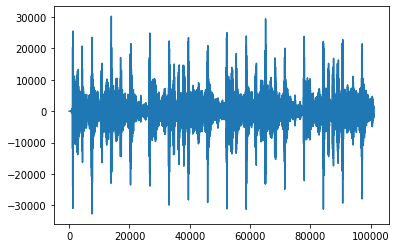

cat_123.wav
(16000, array([  0,   0,   0, ..., 805, 798,  42], dtype=int16))


In [ ]:
from scipy.io import wavfile
import IPython.display as ipd 

#look and some data and hear a sound

w = wavfile.read('/content/cats_dogs/'+sounds[0])
plt.plot(w[1])
plt.show()
print(sounds[0])
ipd.Audio('/content/cats_dogs/'+sounds[0])

print(w)

In [ ]:
def read_wav_files(wav_files):
    '''Returns a list of audio waves
    Params:
        wav_files: List of .wav paths
    
    Returns:
        List of audio signals
    '''
    if not isinstance(wav_files, list):
        wav_files = [wav_files]
    return [sci_wav.read(f)[1] for f in wav_files]

In [ ]:
def librosa_read_wav_files(wav_files):
    if not isinstance(wav_files, list):
        wav_files = [wav_files]
    return [librosa.load(f)[0] for f in wav_files]

In [ ]:
import librosa
wav_rate = librosa.load(X_train[0])[1]
X_train = librosa_read_wav_files(X_train)
X_test  = librosa_read_wav_files(X_test)

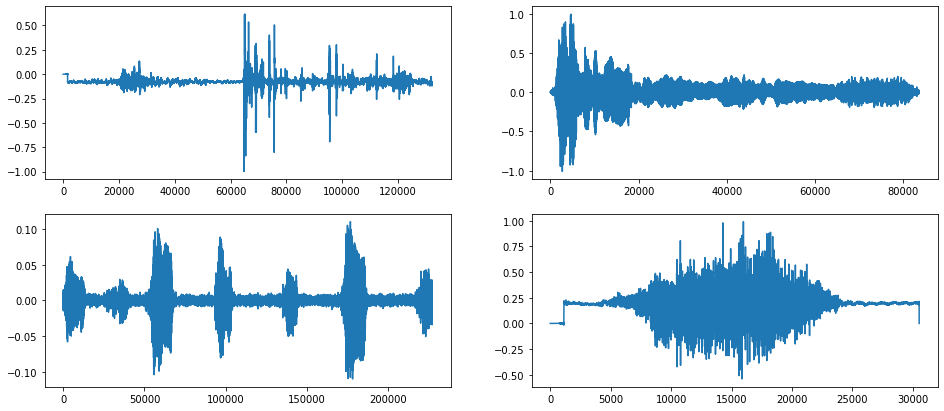

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16,7))
axs[0][0].plot(X_train[0])
axs[0][1].plot(X_train[1])
axs[1][0].plot(X_train[2])
axs[1][1].plot(X_train[3])
plt.show()

In [ ]:
# function to extract all the features needed for the classification
def extract_features(audio_samples, sample_rate):
    extracted_features = np.empty((0, 41, ))
    if not isinstance(audio_samples, list):
        audio_samples = [audio_samples]
        
    for sample in audio_samples:
        # calculate the zero-crossing feature
        zero_cross_feat = librosa.feature.zero_crossing_rate(sample).mean()
        
        # calculate the mfccs features
        mfccs = librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)

        # add zero crossing feature to the feature list
        mfccsscaled = np.append(mfccsscaled, zero_cross_feat)
        mfccsscaled = mfccsscaled.reshape(1, 41, )
        
        extracted_features = np.vstack((extracted_features, mfccsscaled))

    # return the extracted features
    return extracted_features

1
(1, 41)


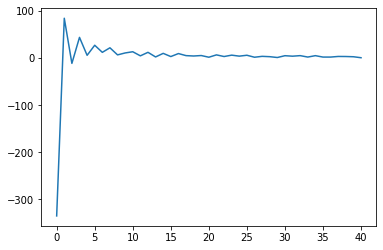

In [ ]:
features = ((extract_features(X_train[0], wav_rate)))

print (len(features))
print (features.shape)
plt.plot(features[0])

In [ ]:
X_train_features = extract_features(X_train, wav_rate)
X_test_features  = extract_features(X_test, wav_rate)
print("Image array shape: ", X_train_features.shape)
print("Image array shape: ", X_test_features.shape)
print("Label array shape: ", y_train.shape)
print("Label array shape: ", y_test.shape)

Image array shape:  (213, 41)
Image array shape:  (64, 41)
Label array shape:  (213, 1)
Label array shape:  (64, 1)


In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [ ]:
#Convert the labels to match what our model will expect
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [ ]:
model = models.Sequential()

model.add(layers.Dense(100, activation = 'relu', input_shape = (41, )))
model.add(layers.Dense(50, activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 9,352
Trainable params: 9,352
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Choose the parameters to train the neural network
best_model_weights = './base.model'
checkpoint = ModelCheckpoint(
    best_model_weights,
    monitor='val_acc',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)

callbacks = [checkpoint]

model.compile(optimizer='adam',
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train_features,
    train_labels,
    validation_data=(X_test_features,test_labels),
    epochs = 25, 
    verbose = 1,
    callbacks=callbacks,
)

Epoch 1/25
7/7 [==============================] - 3s 32ms/step - loss: 13.7900 - accuracy: 0.5117 - val_loss: 7.4988 - val_accuracy: 0.5469
Epoch 2/25
7/7 [==============================] - 0s 9ms/step - loss: 5.6498 - accuracy: 0.6948 - val_loss: 1.2169 - val_accuracy: 0.8438
Epoch 3/25
7/7 [==============================] - 0s 6ms/step - loss: 2.8416 - accuracy: 0.7653 - val_loss: 1.7718 - val_accuracy: 0.7969
Epoch 4/25
7/7 [==============================] - 0s 7ms/step - loss: 2.2138 - accuracy: 0.7746 - val_loss: 0.8356 - val_accuracy: 0.8906
Epoch 5/25
7/7 [==============================] - 0s 7ms/step - loss: 1.4599 - accuracy: 0.8451 - val_loss: 0.6941 - val_accuracy: 0.9219
Epoch 6/25
7/7 [==============================] - 0s 7ms/step - loss: 0.8453 - accuracy: 0.8592 - val_loss: 0.7529 - val_accuracy: 0.8594
Epoch 7/25
7/7 [==============================] - 0s 6ms/step - loss: 0.5741 - accuracy: 0.8779 - val_loss: 0.5822 - val_accuracy: 0.9062
Epoch 8/25
7/7 [================

In [ ]:
#Save the model
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


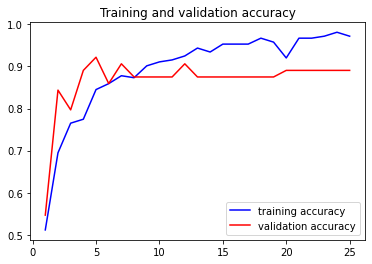

In [ ]:
# list all data in history
print(history.history.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "training accuracy")
plt.plot(epochs, val_acc, 'r', label = "validation accuracy")
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

Cat: 6.188685119923321e-09 Dog: 1.0
The label says that it is a Dog!


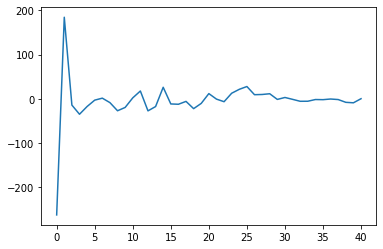

In [ ]:
nr_to_predict = 50
pred = model.predict(X_test_features[nr_to_predict].reshape(1, 41,))

print("Cat: {} Dog: {}".format(pred[0][0], pred[0][1]))

if (y_test[nr_to_predict] == 0):
    print ("The label says that it is a Cat!")
else:
    print ("The label says that it is a Dog!")
    
plt.plot(X_test_features[nr_to_predict])
ipd.Audio(X_test[nr_to_predict],  rate=wav_rate)

Cat: 0.00028248861781321466 Dog: 0.9997175335884094
The label says that it is a Dog!


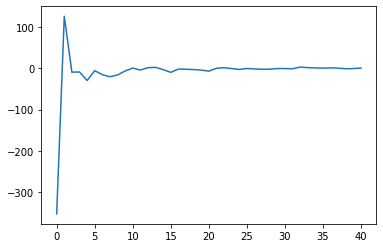

In [ ]:
nr_to_predict = 38
pred = model.predict(X_test_features[nr_to_predict].reshape(1, 41,))

print("Cat: {} Dog: {}".format(pred[0][0], pred[0][1]))

if (y_test[nr_to_predict] == 0):
    print ("The label says that it is a Cat!")
else:
    print ("The label says that it is a Dog!")
    
plt.plot(X_test_features[nr_to_predict])
ipd.Audio(X_test[nr_to_predict],  rate=wav_rate)

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # CSV file
import scipy.io.wavfile as sci_wav  # Open wav files
import matplotlib.pyplot as plt
import numpy as np
import random


ROOT_DIR = '/content/cats_dogs/'
CSV_PATH = '/content/train_test_split.csv'

def read_wav_files(wav_files):
    '''Returns a list of audio waves
    Params:
        wav_files: List of .wav paths

    Returns:
        List of audio signals
    '''
    if not isinstance(wav_files, list):
        wav_files = [wav_files]
    return [sci_wav.read(ROOT_DIR + f)[1] for f in wav_files]


def get_trunk(_X, idx, sample_len, rand_offset=False):
    '''Returns a trunk of the 1D array <_X>

    Params:
        _X: the concatenated audio samples
        idx: _X will be split in <sample_len> items. _X[idx]
        rand_offset: boolean to say whether or not we use an offset
    '''
    randint = np.random.randint(10000) if rand_offset is True else 0
    start_idx = (idx * sample_len + randint) % len(_X)
    end_idx = ((idx + 1) * sample_len + randint) % len(_X)
    if end_idx > start_idx:  # normal case
        return _X[start_idx: end_idx]
    else:
        return np.concatenate((_X[start_idx:], _X[:end_idx]))
def get_augmented_trunk(_X, idx, sample_len, added_samples=0):
    X = get_trunk(_X, idx, sample_len)

    # Add other audio of the same class to this sample
    for _ in range(added_samples):
        ridx = np.random.randint(len(_X))  # random index
        X = X + get_trunk(_X, ridx, sample_len)

    # One might add more processing (like adding noise)

    return X

def dataset_gen(is_train=True, batch_shape=(20, 16000), sample_augmentation=0):
    '''This generator is going to return training batchs of size <batch_shape>

    Params:
        is_train: True if you want the training generator
        batch_shape: a tupple (or list) consisting of 2 arguments, the number
            of samples per batchs and the number datapoints per samples
            (16000=1s)
        sample_augmentation: augment each audio sample by n other audio sample.
            Only works when <is_train> is True
    '''
    s_per_batch = batch_shape[0]
    s_len = batch_shape[1]

    X_cat = dataset['train_cat'] if is_train else dataset['test_cat']
    X_dog = dataset['train_dog'] if is_train else dataset['test_dog']

    # Random permutations (for X indexes)
    nbatch = int(max(len(X_cat), len(X_cat)) / s_len)
    perms = [list(enumerate([i] * nbatch)) for i in range(2)]
    perms = sum(perms, [])
    random.shuffle(perms)


    # Go through all the permutations
    y_batch = np.zeros(s_per_batch)
    X_batch = np.zeros(batch_shape)
    while len(perms) > s_per_batch:

        # Generate a batch
        for bidx in range(s_per_batch):
            perm, _y = perms.pop()  # Load the permutation
            y_batch[bidx] = _y  

            # Select wether the sample is a cat or a dog
            _X = X_cat if _y == 0 else X_dog

            # Apply the permutation to the good set
            if is_train:
                X_batch[bidx] = get_augmented_trunk(
                    _X,
                    idx=perm,
                    sample_len=s_len,
                    added_samples=sample_augmentation)
            else:
                X_batch[bidx] = get_trunk(_X, perm, s_len)

        yield (X_batch.reshape(s_per_batch, s_len, 1),
               y_batch.reshape(-1, 1))

def load_dataset(dataframe):
    '''Load the dataset in a dictionary.
    From the dataframe, it reads the [train_cat, train_dog, test_cat, test_dog]
    columns and loads their corresponding arrays into the <dataset> dictionary

    Params:
        dataframe: a pandas dataframe with 4 columns [train_cat, train_dog, 
        test_cat, test_dog]. In each columns, many WAV names (eg. ['cat_1.wav',
        'cat_2.wav']) which are going to be read and append into a list

    Return:
        dataset = {
            'train_cat': [[0,2,3,6,1,4,8,...],[2,5,4,6,8,7,4,5,...],...]
            'train_dog': [[sound 1],[sound 2],...]
            'test_cat': [[sound 1],[sound 2],...]
            'test_dog': [[sound 1],[sound 2],...]
        }
    '''
    df = dataframe

    dataset = {}
    for k in ['train_cat', 'train_dog', 'test_cat', 'test_dog']:
        v = list(df[k].dropna())
        v = read_wav_files(v)
        v = np.concatenate(v).astype('float32')

        # Compute mean and variance
        if k == 'train_cat':
            dog_std = dog_mean = 0
            cat_std, cat_mean = v.std(), v.mean()
        elif k == 'train_dog':
            dog_std, dog_mean = v.std(), v.mean()

        # Mean and variance suppression
        std, mean = (cat_std, cat_mean) if 'cat' in k else (dog_std, dog_mean)
        v = (v - mean) / std
        dataset[k] = v

        print('loaded {} with {} sec of audio'.format(k, len(v) / 16000))

    return dataset

df = pd.read_csv(CSV_PATH)
dataset = load_dataset(df)

loaded train_cat with 942.0454375 sec of audio
loaded train_dog with 317.2408125 sec of audio
loaded test_cat with 381.8525 sec of audio
loaded test_dog with 281.1975 sec of audio
